In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['all-census-data', 'suicides-in-india', 'rainfall-in-india']


In [2]:
suicides = pd.read_csv('../input/suicides-in-india/Suicides in India 2001-2012.csv')

In [3]:
suicides.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
suicides = suicides[suicides['Year']==2012]

In [5]:
for col in suicides.columns[:-1]:
    print(col,'-',suicides[col].nunique(),'-',suicides[col].unique())
    print('\n')

State - 38 - ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


Year - 1 - [2012]


Type_code - 5 - ['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']


Type - 66 - ['Failure in Examination' 'Causes Not known' 'Dowry Dispute'
 'Ideological Causes/Hero Worshipping' 'Love Affairs'
 'Other Causes (Please Specity)' 'Unemployment' 'Paralysis'
 'Cancellation/Non-Settlement of Marriage' 'Other Prolonged Illness'
 'Physical Abuse (Rape/Incest Etc.)' 'Fall in Social Reputation'
 'Illness (Aids/STD)' 'Insanity/Mental

In [6]:
suicides[suicides['Type_code']=='Means_adopted'].head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6429,A & N Islands,2012,Means_adopted,By Self Infliction of injury,Female,0-14,0
6430,A & N Islands,2012,Means_adopted,By Fire/Self Immolation,Female,0-14,0
6431,A & N Islands,2012,Means_adopted,By Overdose of sleeping pills,Female,0-14,0
6432,A & N Islands,2012,Means_adopted,By Jumping from (Other sites),Female,0-14,0
6433,A & N Islands,2012,Means_adopted,By Hanging,Female,0-14,1


In [7]:
suicides[suicides['Type_code']=='Means_adopted'].Type.nunique()

16

In [8]:
suicides[suicides['Type_code']=='Means_adopted'].groupby('Type').sum()

,Year,Total
Type,,
By Consuming Insecticides,704200,19929
By Consuming Other Poison,704200,19445
By Drowning,704200,7882
By Fire-Arms,704200,450
By Fire/Self Immolation,704200,11438
By Hanging,704200,50062
By Jumping from (Building),704200,566
By Jumping from (Other sites),704200,752
By Jumping off Moving Vehicles/Trains,704200,620


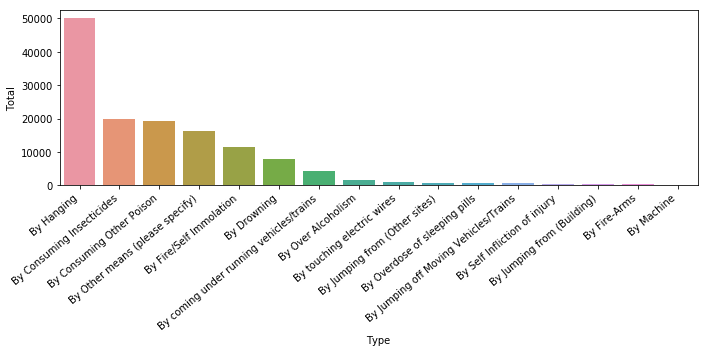

In [9]:
means_adopted = suicides[suicides['Type_code']=='Means_adopted'].groupby('Type').sum().sort_values('Total', ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=means_adopted.index,y=means_adopted['Total'],data=means_adopted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

I'll not be analysing further into the means of suicide as they hold less value. What is more important is to analyse the causes.

In [10]:
suicides[suicides['Type_code']=='Education_Status'].head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6413,A & N Islands,2012,Education_Status,Graduate,Female,0-100+,0
6414,A & N Islands,2012,Education_Status,Matriculate/Secondary,Female,0-100+,13
6415,A & N Islands,2012,Education_Status,Post Graduate and Above,Female,0-100+,0
6416,A & N Islands,2012,Education_Status,Diploma,Female,0-100+,0
6417,A & N Islands,2012,Education_Status,Middle,Female,0-100+,22


In [11]:
educational_status = suicides[suicides['Type_code']=='Education_Status']

In [12]:
for col in educational_status.columns[3:-1]:
    print(col,'-',educational_status[col].nunique(),'-',educational_status[col].unique())
    print('\n')

Type - 8 - ['Graduate' 'Matriculate/Secondary' 'Post Graduate and Above' 'Diploma'
 'Middle' 'Hr. Secondary/Intermediate/Pre-Universit' 'No Education'
 'Primary']


Gender - 2 - ['Female' 'Male']


Age_group - 1 - ['0-100+']




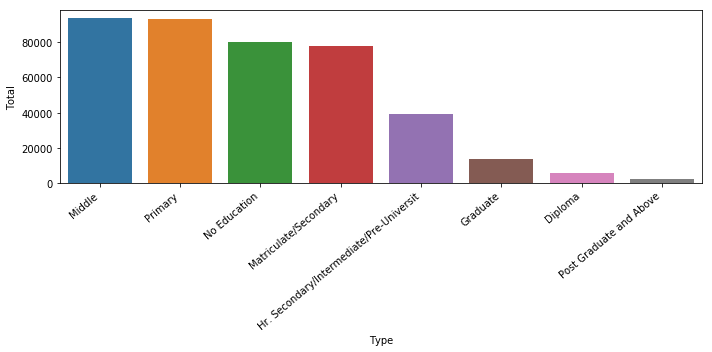

In [13]:
educational_status_grouped = suicides[suicides['Type_code']=='Education_Status'].groupby('Type').sum().sort_values('Total', ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=educational_status_grouped.index,y=educational_status_grouped['Total'],data=educational_status_grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

The thing that i can infer is that suicide rates are much less in students who had graduated and beyond. There is much more suicide rates among students who were still in school. Can we infer that in India the pressure a students faces is much more in school than in college. Maybe the hype around board exams and college entrance exams might be the reason for it!

Lets break down the above chart gender wise - 

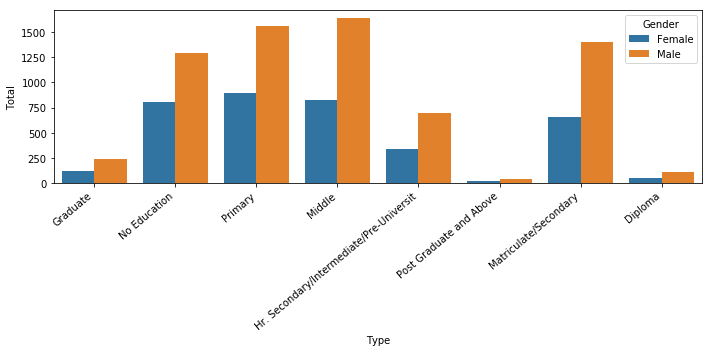

In [14]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Type',y='Total',hue='Gender',data=educational_status.sort_values('Total',ascending='False'),ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Among students, suicides are much higher among boys as compared to girls. Maybe its due to the patriarchal nature of the Indian society that more is expected from a boy because he is expected to head the family and is supposed to be the sole and main financial contributor.

In [15]:
educational_status.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6413,A & N Islands,2012,Education_Status,Graduate,Female,0-100+,0
6414,A & N Islands,2012,Education_Status,Matriculate/Secondary,Female,0-100+,13
6415,A & N Islands,2012,Education_Status,Post Graduate and Above,Female,0-100+,0
6416,A & N Islands,2012,Education_Status,Diploma,Female,0-100+,0
6417,A & N Islands,2012,Education_Status,Middle,Female,0-100+,22


In [16]:
educational_status['Type'].unique()

array(['Graduate', 'Matriculate/Secondary', 'Post Graduate and Above',
       'Diploma', 'Middle', 'Hr. Secondary/Intermediate/Pre-Universit',
       'No Education', 'Primary'], dtype=object)

In [17]:
educational_status_statewise = educational_status.groupby('State').sum().sort_values('Total')
educational_status_statewise = educational_status_statewise.drop(['Total (States)','Total (All India)','Total (Uts)'])

Text(0.5, 1.0, 'Absolute number of student suicides in Indian States')

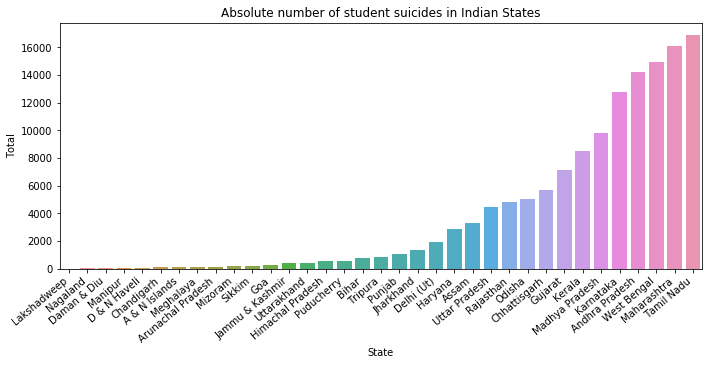

In [18]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=educational_status_statewise.index,y=educational_status_statewise['Total'],data=educational_status_statewise)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Absolute number of student suicides in Indian States')

The absolute suicide numbers might not be the correct measure to measure a state's ranking as they vary quite a lot in terms of population. Hence use the population data and then try to rank states.

In [19]:
#print(os.listdir("../input/all-census-data/"))
population_data = pd.read_csv('../input/all-census-data/elementary_2015_16.csv')

In [20]:
population_data.head()

,Unnamed: 0,YEAR,STATE NAME,DISTRICT NAME,TOTAL POULATION,PERCENTAGE URBAN POPULATION,0-6 POPULATION,GROWTH RATE,SEX RATIO,PERCENTAGE SC POPULATION,PERCENTAGE ST POPULATION,OVERALL LITERACY,FEMALE LITERACY,MALE LITERACY,AREA (SQ. KM) (AREA SQKM),AGE GROUP 6 TO 10 (TOT 6 10 15),AGE GROUP 11 TO 13 (TOT 11 13 15),PRIMARY ONLY (SCH1),PRIMARY WITH UPPER PRIMARY (SCH2),PRIMARY WITH UPPER PRIMARY SEC/H.SEC (SCH3),UPPER PRIMARY ONLY (SCH4),UPPER PRIMARY WITH SEC./H.SEC (SCH5),PRIMARY WITH UPPER PRIMARY SEC (SCH6),UPPER PRIMARY WITH SEC. (SCH7),NO RESPONSE (SCH9),TOTAL (SCHTOT),PRIMARY ONLY (SCH1G),PRIMARY WITH UPPER PRIMARY (SCH2G),PRIMARY WITH UPPER PRIMARY SEC/H.SEC (SCH3G),UPPER PRIMARY ONLY (SCH4G),UPPER PRIMARY WITH SEC./H.SEC (SCH5G),PRIMARY WITH UPPER PRIMARY SEC (SCH6G),UPPER PRIMARY WITH SEC. (SCH7G),NO RESPONSE (SCH9G),TOTAL (SCHTOTG),PRIMARY ONLY (SCH1P),PRIMARY WITH UPPER PRIMARY (SCH2P),PRIMARY WITH UPPER PRIMARY SEC/H.SEC (SCH3P),UPPER PRIMARY ONLY (SCH4P),UPPER PRIMARY WITH SEC./H.SEC (SCH5P),...,PRIMARY WITH UPPER PRIMARY (ENRE52),PRIMARY WITH UPPER PRIMARY SEC/H.SEC (ENRE53),UPPER PRIMARY ONLY (ENRE54),UPPER PRIMARY WITH SEC./H.SEC (ENRE55),PRIMARY WITH UPPER PRIMARY SEC (ENRE56),UPPER PRIMARY WITH SEC. (ENRE57),MALE (TCH 5556M),FEMALE (TCH 5556F),TOTAL (TCH 5556T),MALE (TCH 5758M),FEMALE (TCH 5758F),TOTAL (TCH 5758T),MALE (TCH 5960M),FEMALE (TCH 5960F),TOTAL (TCH 5960T),PRIMARY LEVEL (PPTR30),UPPER PRIMARY (UPTR35),PRIMARY LEVEL (PSCR30),UPPER PRIMARY (USCR35),(NOTCH ASS),(TCHINV),ALL (PTXT ALL),SC (PTXT SC),ST (PTXT ST),ALL (PUNI ALL),SC (PUNI SC),ST (PUNI ST),ALL (UTXT ALL),SC (UTXT SC),ST (UTXT ST),ALL (UUNI ALL),SC (UUNI SC),ST (UUNI ST),(TOTCLS1G),(TOTCLS2G),(TOTCLS3G),(TOTCLS4G),(TOTCLS5G),(TOTCLS6G),(TOTCLS7G)
0,0,2015-16,JAMMU AND KASHMIR,KUPWARA,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10,2379.0,135672.0,72701.0,1107,818,2,14,2,84,49,0,2076,980,697,1,14,2,49,49,0,1792,127,121,1,0,0,...,0,0,0,0,0,0,78,26,104,35,2,37,6,0,6,86,4,92,33,453,57,59116,11,9749,46949,27,7534,27433,27,3472,21322,26,2594,3489,5315,27,62,23,852,239
1,1,2015-16,JAMMU AND KASHMIR,BARAMULA,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35,4243.0,117874.0,70952.0,1215,825,9,11,5,176,69,0,2310,1108,639,1,11,5,96,69,0,1929,107,186,8,0,0,...,0,0,0,0,0,0,118,90,208,63,32,95,5,1,6,122,2,222,98,313,40,53237,0,4406,38161,0,3801,26138,0,1763,17307,0,1571,4127,5800,210,53,30,1665,360
2,2,2015-16,JAMMU AND KASHMIR,SRINAGAR,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95,1979.0,113560.0,62397.0,258,417,36,2,0,263,9,0,985,203,209,1,2,0,65,9,0,489,55,208,35,0,0,...,0,0,0,0,0,0,59,216,275,85,151,236,11,12,23,14,0,81,36,375,54,13624,227,1266,15286,276,1251,6370,34,429,5444,31,408,817,3284,886,11,0,2873,40
3,3,2015-16,JAMMU AND KASHMIR,BADGAM,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56,1361.0,118477.0,58838.0,755,537,10,10,1,98,57,0,1468,697,423,1,10,1,40,57,0,1229,56,114,9,0,0,...,0,0,0,0,0,0,100,41,141,44,9,53,0,0,0,41,1,62,20,143,18,37707,0,3098,27383,0,2411,17795,18,1052,12469,18,857,2290,3837,119,45,8,1035,325
4,4,2015-16,JAMMU AND KASHMIR,PULWAMA,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41,1086.0,64493.0,30166.0,532,339,4,14,2,94,43,0,1028,497,233,0,14,2,23,43,0,812,35,106,4,0,0,...,0,0,0,0,0,0,83,32,115,46,7,53,3,0,3,15,1,17,8,37,9,20123,132,2775,16660,44,2531,9438,62,1004,7408,17,855,1688,2584,151,67,5,1101,209


In [21]:
population_data = population_data[['STATE NAME','TOTAL POULATION']]

In [22]:
population_data = population_data.groupby('STATE NAME').sum()

In [23]:
population_data.columns = ['population']

In [24]:
#population data is of the year when the state andhra pradesh had been divided into 2 - one itself and the other named telangana
#education data is of the time when it was one whole
#hence the population data had to be manipulated for these 2 states
population_data.at['ANDHRA PRADESH', 'population'] = population_data.ix['ANDHRA PRADESH']['population'] + population_data.ix['TELANGANA']['population']

In [25]:
population_data.drop('TELANGANA',axis=0,inplace=True)

In [26]:
educational_status_statewise = educational_status_statewise.sort_values('State')
population_data.index = population_data.index.str.lower()
educational_status_statewise.index = educational_status_statewise.index.str.lower()

In [27]:
educational_status_statewise.rename(index={'a & n islands': 'andaman and nicobar islands',
                                          'd & n haveli':'dadra and nagar haveli',
                                          'delhi (ut)':'delhi',
                                          'daman & diu':'daman and diu',
                                          'jammu & kashmir':'jammu and kashmir',
                                          'puducherry':'pondicherry'},inplace=True)

In [28]:
new_data = pd.concat([population_data,educational_status_statewise],axis=1)

In [29]:
new_data.head()

,population,Year,Total
andaman and nicobar islands,379944.0,32192,121
andhra pradesh,84665533.0,32192,14238
arunachal pradesh,1382611.0,32192,130
assam,31169272.0,32192,3264
bihar,103804637.0,32192,759


In [30]:
new_data.columns

Index(['population', 'Year', 'Total'], dtype='object')

In [31]:
new_data['%suicide'] = (new_data['Total']/new_data['population'])*100

In [32]:
new_data = new_data.sort_values('%suicide',ascending=False)
new_data.head()

,population,Year,Total,%suicide
pondicherry,1244464.0,32192,541,0.043473
andaman and nicobar islands,379944.0,32192,121,0.031847
sikkim,607688.0,32192,181,0.029785
kerala,33387677.0,32192,8490,0.025429
tamil nadu,68915255.0,32192,16927,0.024562


Text(0.5, 1.0, 'Rate of student suicides in Indian States')

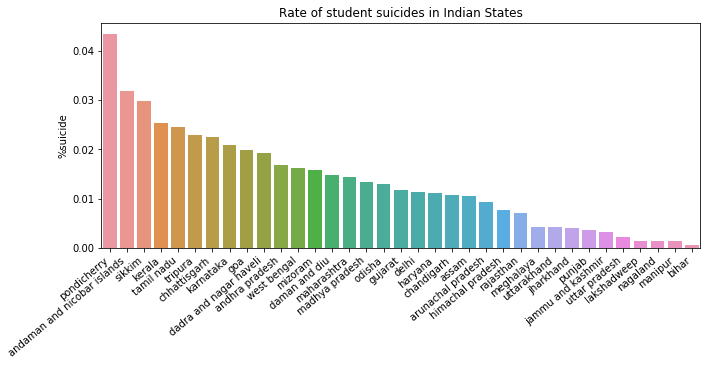

In [33]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=new_data.index,y=new_data['%suicide'],data=new_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Rate of student suicides in Indian States')

In [34]:
professional_profile = suicides[suicides['Type_code']=='Professional_Profile']

In [35]:
professional_profile.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6589,A & N Islands,2012,Professional_Profile,Self-employed (Business activity),Female,0-14,0
6590,A & N Islands,2012,Professional_Profile,Service (Private),Female,0-14,0
6591,A & N Islands,2012,Professional_Profile,Others (Please Specify),Female,0-14,0
6592,A & N Islands,2012,Professional_Profile,Retired Person,Female,0-14,0
6593,A & N Islands,2012,Professional_Profile,House Wife,Female,0-14,0


In [36]:
for col in professional_profile.columns[:-1]:
    print(col,'-',professional_profile[col].nunique(),'-',professional_profile[col].unique())

State - 35 - ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
Year - 1 - [2012]
Type_code - 1 - ['Professional_Profile']
Type - 11 - ['Self-employed (Business activity)' 'Service (Private)'
 'Others (Please Specify)' 'Retired Person' 'House Wife'
 'Public Sector Undertaking' 'Professional Activity' 'Student'
 'Service (Government)' 'Unemployed' 'Farming/Agriculture Activity']
Gender - 2 - ['Female' 'Male']
Age_group - 5 - ['0-14' '15-29' '30-44' '45-59' '60+']


Text(0.5, 1.0, 'Suicides categorised by different profession')

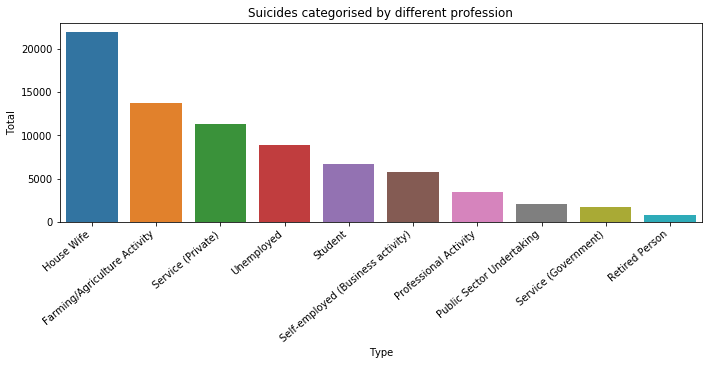

In [37]:
professional_profile = professional_profile[professional_profile['Type']!='Others (Please Specify)']
by_profession = professional_profile.groupby('Type').sum()
by_profession = by_profession.sort_values('Total',ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(x=by_profession.index,y=by_profession['Total'],data=by_profession)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Suicides categorised by different profession')

Highest suicide rates among House Wives is a worrying sign. An article by BBC addresses this problem too - https://www.bbc.com/news/world-asia-india-35994601. In India, there is much more public debates around suicides by farmers than among housewives. The Agriculture sector in India is highly volatile because more than 60% of the land under cultivation is dependent on rainfall as its primary source of irrigation. Due to global warming the rainfall patterns are changing which are putting our farmers in deep distress leading to high suicide rates among them.

Lets just analyse if rainfall patterns influence suicides among farmers in India - 

In [38]:
#print((os.listdir("../input/rainfall-in-india/")))
rainfall = pd.read_csv('../input/rainfall-in-india/district wise rainfall normal.csv')
rainfall.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [39]:
rainfall = rainfall.groupby('STATE_UT_NAME').sum()
rainfall = rainfall[['ANNUAL']]
rainfall.columns = ['Annual Rainfall']
rainfall.head()

,Annual Rainfall
STATE_UT_NAME,
ANDAMAN And NICOBAR ISLANDS,8734.2
ANDHRA PRADESH,21736.7
ARUNACHAL PRADESH,46838.0
ASSAM,66267.7
BIHAR,45621.1


In [40]:
rainfall.index = rainfall.index.str.lower()

In [41]:
rainfall.rename(index={'andaman and nicobar islands': 'a & n islands',
                        'chatisgarh':'chhattisgarh',
                        'dadar nagar haveli':'d & n haveli',
                        'daman and dui':'daman & diu',
                        'delhi':'delhi (ut)',
                        'himachal':'himachal pradesh',
                        'jammu and kashmir':'jammu & kashmir',
                        'orissa':'odiasha',
                        'pondicherry':'puducherry',
                        'uttaranchal':'uttarakhand'},inplace=True)

In [42]:
agricultural_suicides = professional_profile[professional_profile['Type']=='Farming/Agriculture Activity']
agricultural_suicides = agricultural_suicides.groupby('State').sum()
agricultural_suicides.index = agricultural_suicides.index.str.lower()
agricultural_suicides.head()

,Year,Total
State,,
a & n islands,20120,0
andhra pradesh,20120,2572
arunachal pradesh,20120,11
assam,20120,344
bihar,20120,68


In [43]:
agr_suicide_rainfall_data = pd.concat([rainfall,agricultural_suicides],axis=1)
agr_suicide_rainfall_data.head()

,Annual Rainfall,Year,Total
a & n islands,8734.2,20120.0,0.0
andhra pradesh,21736.7,20120.0,2572.0
arunachal pradesh,46838.0,20120.0,11.0
assam,66267.7,20120.0,344.0
bihar,45621.1,20120.0,68.0


Text(-2.450000000000003, 0.5, 'Suicides')

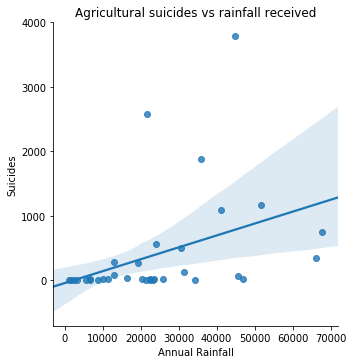

In [44]:
sns.lmplot(x='Annual Rainfall',y='Total',data=agr_suicide_rainfall_data)
ax = plt.gca()
ax.set_title("Agricultural suicides vs rainfall received")
ax.set_ylabel('Suicides')

So we were wrong to generalise that agricultural suicides are directly proportional to rainfall patterns. The picture is not that simple. Maybe other factors such as ease of access to financial services(loans etc), medical services etc also play a role.

getting back to suicides among professionals - 

Text(0.5, 1.0, 'Suicides categorised by different profession')

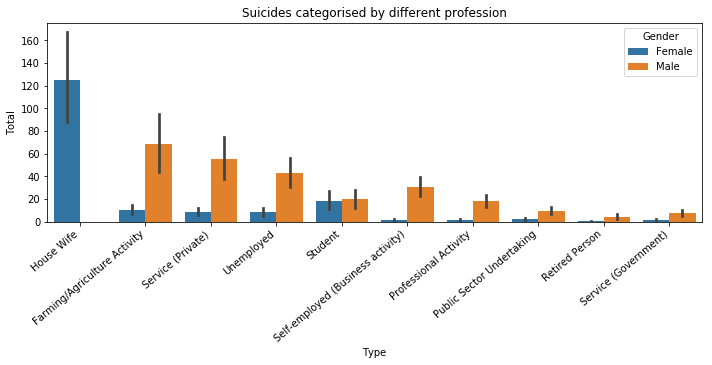

In [45]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Type',y='Total',hue='Gender',data=professional_profile.sort_values('Total',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Suicides categorised by different profession')

As was the case with students, in professional front too, suicides are much more among men than women. But suicides among housewives(females) are almost double than among any other professional activity.

In [46]:
social_status = suicides[suicides['Type_code']=='Social_Status']
social_status.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6702,A & N Islands,2012,Social_Status,Never Married,Female,0-100+,11
6703,A & N Islands,2012,Social_Status,Divorcee,Female,0-100+,0
6704,A & N Islands,2012,Social_Status,Seperated,Female,0-100+,0
6705,A & N Islands,2012,Social_Status,Widowed/Widower,Female,0-100+,0
6706,A & N Islands,2012,Social_Status,Married,Female,0-100+,30


In [47]:
for col in social_status.columns[:-1]:
    print(col,'-',social_status[col].nunique(),'-',social_status[col].unique())

State - 38 - ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
Year - 1 - [2012]
Type_code - 1 - ['Social_Status']
Type - 5 - ['Never Married' 'Divorcee' 'Seperated' 'Widowed/Widower' 'Married']
Gender - 2 - ['Female' 'Male']
Age_group - 1 - ['0-100+']


In [48]:
social_status.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6702,A & N Islands,2012,Social_Status,Never Married,Female,0-100+,11
6703,A & N Islands,2012,Social_Status,Divorcee,Female,0-100+,0
6704,A & N Islands,2012,Social_Status,Seperated,Female,0-100+,0
6705,A & N Islands,2012,Social_Status,Widowed/Widower,Female,0-100+,0
6706,A & N Islands,2012,Social_Status,Married,Female,0-100+,30


Text(0.5, 1.0, 'Suicides categorised by marital status')

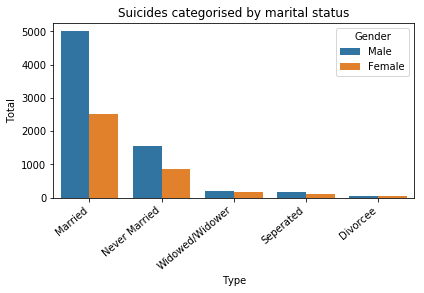

In [49]:
ax = sns.barplot(x='Type',y='Total',data=social_status.sort_values('Total'),hue='Gender',
                 ci=None,order=['Married','Never Married','Widowed/Widower','Seperated','Divorcee'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Suicides categorised by marital status')

In [50]:
suicide_causes = suicides[suicides['Type_code']=='Causes']
suicide_causes.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
6153,A & N Islands,2012,Causes,Failure in Examination,Female,0-14,0
6154,A & N Islands,2012,Causes,Causes Not known,Female,0-14,0
6155,A & N Islands,2012,Causes,Dowry Dispute,Female,0-14,0
6156,A & N Islands,2012,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
6157,A & N Islands,2012,Causes,Love Affairs,Female,0-14,0


In [51]:
for col in suicide_causes.columns[:-1]:
    print(col,'-',suicide_causes[col].nunique(),'-',suicide_causes[col].unique())

State - 35 - ['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
Year - 1 - [2012]
Type_code - 1 - ['Causes']
Type - 26 - ['Failure in Examination' 'Causes Not known' 'Dowry Dispute'
 'Ideological Causes/Hero Worshipping' 'Love Affairs'
 'Other Causes (Please Specity)' 'Unemployment' 'Paralysis'
 'Cancellation/Non-Settlement of Marriage' 'Other Prolonged Illness'
 'Physical Abuse (Rape/Incest Etc.)' 'Fall in Social Reputation'
 'Illness (Aids/STD)' 'Insanity/Mental Illness'
 'Professional/Career Problem' 'Property Dispute' 'Divorce'
 'Death of Dear Person' 'Family Problems' 'Drug Abuse/Addiction

In [52]:
suicide_causes_bytype = suicide_causes.groupby('Type').sum().sort_values('Total',ascending=False)
suicide_causes_bytype.head()

,Year,Total
Type,,
Family Problems,704200,30792
Other Causes (Please Specity),704200,20788
Causes Not known,704200,18176
Other Prolonged Illness,704200,15699
Insanity/Mental Illness,704200,7769


In [53]:
suicide_causes_bytype.drop(['Other Causes (Please Specity)','Causes Not known'],inplace=True)
suicide_causes_bytype.head()

,Year,Total
Type,,
Family Problems,704200,30792
Other Prolonged Illness,704200,15699
Insanity/Mental Illness,704200,7769
Drug Abuse/Addiction,704200,4008
Love Affairs,704200,3849


Text(0.5, 1.0, 'Major causes of suicides in India')

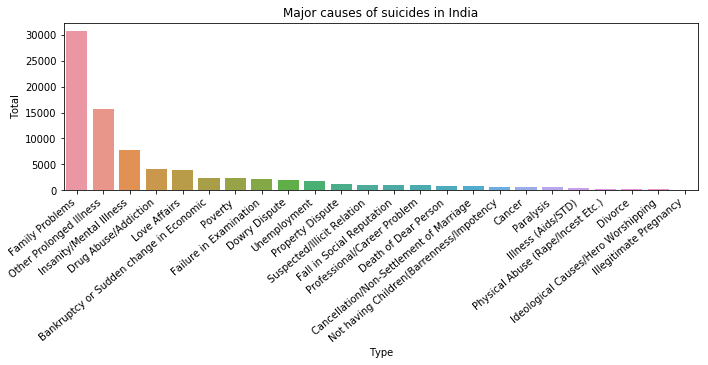

In [54]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=suicide_causes_bytype.index,y='Total',data=suicide_causes_bytype,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title('Major causes of suicides in India')

The major causes of suicides in India are Family Problems, Prolonged and Mental Illnesses, Drug Abuse and Love Affairs -  all of which could be attended to by proper counselling. The Indian State needs to evolve institutions which can spread awareness about these issues and make psychologists accessable to anyone who is dealing with such issues.